In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h2o
from h2o.estimators import H2ORandomForestEstimator
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from h2o.estimators import H2OGradientBoostingEstimator
from h2o.automl import H2OAutoML

In [2]:
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

In [3]:
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [4]:
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
hour_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### Task

1) Understand how the h2o package helps in explainability with various plots on
    relation between attributes and the defect prediction.


The h2o package helps in explainability with various plots by providing visualizations that show how the different features in a dataset affect the model's predictions. These plots can be used to understand the relationships between the features and the target variable, and to identify the features that are most important for the model.

In [6]:
day_data.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [7]:
!pip install h2o

In [10]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.381-b09, mixed mode)
  Starting server from C:\Users\hp\anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\hp\AppData\Local\Temp\tmpqx3anf5y
  JVM stdout: C:\Users\hp\AppData\Local\Temp\tmpqx3anf5y\h2o_hp_started_from_python.out
  JVM stderr: C:\Users\hp\AppData\Local\Temp\tmpqx3anf5y\h2o_hp_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,"3 years, 2 months and 23 days !!!"
H2O_cluster_name:,H2O_from_python_hp_ooiucl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.403 Gb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [11]:
path = (r'C:\Users\hp\Documents\Data Scientist\Session project\wetransfer_week-12_2023-08-20_0811 (1)\Week 12\Supporting Data Sets/day.csv')

In [12]:
data = h2o.import_file(path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [16]:
# Define features and target variable
x = data.columns[:-1]
y = "cnt"

In [13]:
# Split the data into training and testing sets
train, test = data.split_frame(ratios=[0.8])

In [14]:
# Initialize the Random Forest model
rf_model = H2ORandomForestEstimator()

In [17]:
# Train the model
rf_model.train(x=x, y=y, training_frame=train)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [18]:
# Make predictions
predictions = rf_model.predict(test)

drf prediction progress: |████████████████████████████████████████████████| 100%


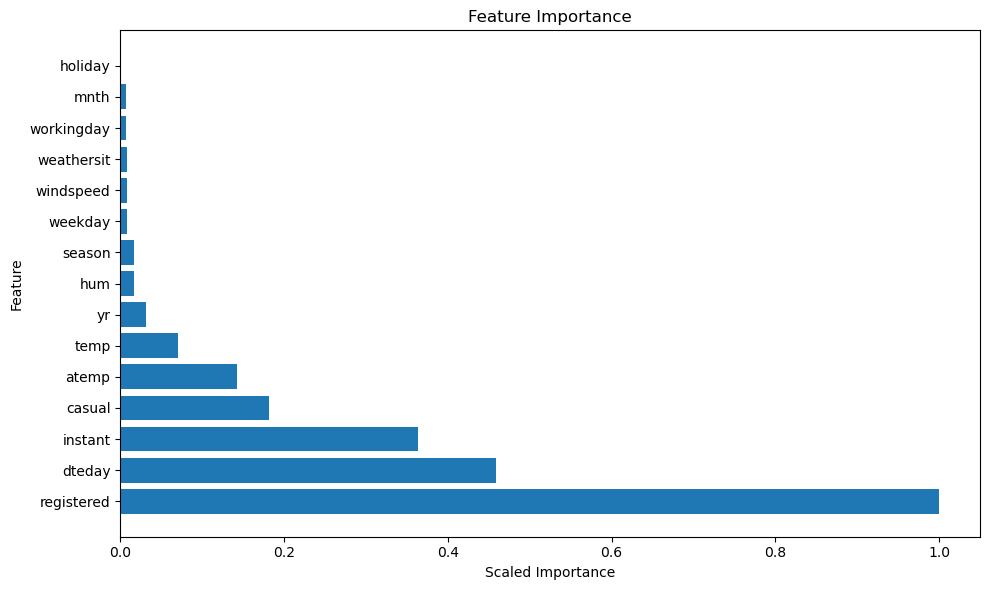

In [19]:
# Get feature importance
feature_importance = rf_model.varimp(use_pandas=True)

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['variable'], feature_importance['scaled_importance'])
plt.xlabel('Scaled Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

In [20]:
print(predictions)

predict
1157.76
1200.08
938.58
1558.5
1554.62
968.82
2895.41
2103.82
1681.5
2126.48


contributions progress: |█████████████████████████████████████████████████| 100%


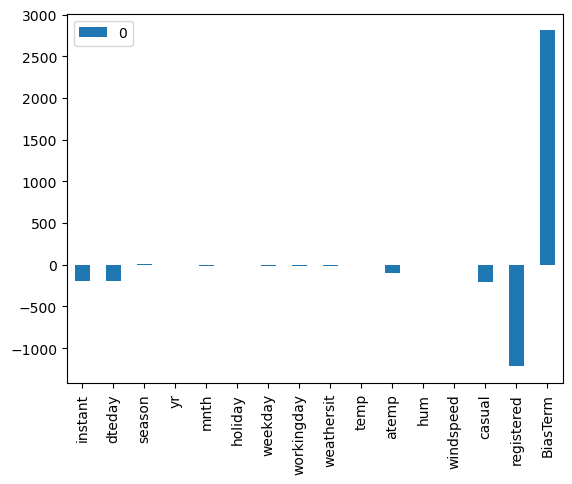

In [23]:
# Model Contributions (Waterfall Plot)
contributions = rf_model.predict_contributions(train[0, :])
waterfall = contributions.as_data_frame().T.plot(kind='bar')
plt.show()

2) Build an explainable ML model using the H2o package on the bike rental dataset
    and display various plots and write your findings. (25 points)
    
        a) Consider cnt as the target column.
        b) Consider the Day data and hourly data and build two models separately.

In [27]:
import h2o
from h2o.estimators import H2ORandomForestEstimator
import pandas as pd
import matplotlib.pyplot as plt

# Initialize H2O cluster
h2o.init()

# Load the bike rental dataset (day data)
day_data = pd.read_csv('day.csv')
hour_data = pd.read_csv('hour.csv')

# Convert pandas DataFrames to H2O frames
h2o_day_data = h2o.H2OFrame(day_data)
h2o_hour_data = h2o.H2OFrame(hour_data)

# Define x (features) and y (target) columns
x = day_data.columns.drop(['cnt', 'dteday'])  # Features excluding 'dteday' and 'cnt'
y = 'cnt'  # Target column

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,11 mins 40 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.4
H2O_cluster_version_age:,"3 years, 2 months and 23 days !!!"
H2O_cluster_name:,H2O_from_python_hp_ooiucl
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.009 Gb
H2O_cluster_total_cores:,12
H2O_cluster_allowed_cores:,12
H2O_cluster_status:,"locked, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [31]:
# Convert pandas DataFrames to H2O frames
h2o_day_data = h2o.H2OFrame(day_data)
h2o_hour_data = h2o.H2OFrame(hour_data)

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [29]:
# Build the random forest models
rf_model_day = H2ORandomForestEstimator()
rf_model_hour = H2ORandomForestEstimator()

In [32]:
# Define x (features) and y (target) columns
x = day_data.columns.drop(['cnt', 'dteday']).tolist()  # Features excluding 'dteday' and 'cnt'
y = 'cnt'  # Target column

In [33]:
# Split the data into training and testing sets
train_day, test_day = h2o_day_data.split_frame(ratios=[0.8])
train_hour, test_hour = h2o_hour_data.split_frame(ratios=[0.8])

In [34]:
# Build the random forest models
rf_model_day = H2ORandomForestEstimator()
rf_model_day.train(x=x, y=y, training_frame=train_day)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [35]:
rf_model_hour = H2ORandomForestEstimator()
rf_model_hour.train(x=x, y=y, training_frame=train_hour)

drf Model Build progress: |███████████████████████████████████████████████| 100%


In [36]:
# Variable Importances
feature_importance_day = rf_model_day.varimp(use_pandas=True)
feature_importance_hour = rf_model_hour.varimp(use_pandas=True)

In [37]:
print("Feature Importance (Day Data):")
print(feature_importance_day)

Feature Importance (Day Data):
      variable  relative_importance  scaled_importance  percentage
0   registered         3.375463e+10           1.000000    0.369778
1       casual         1.741575e+10           0.515952    0.190787
2      instant         1.486713e+10           0.440447    0.162868
3        atemp         7.516452e+09           0.222679    0.082342
4         temp         5.484793e+09           0.162490    0.060085
5           yr         5.299256e+09           0.156993    0.058053
6       season         2.438228e+09           0.072234    0.026710
7         mnth         1.773287e+09           0.052535    0.019426
8          hum         8.789315e+08           0.026039    0.009629
9    windspeed         4.641850e+08           0.013752    0.005085
10  workingday         4.382422e+08           0.012983    0.004801
11     weekday         4.342135e+08           0.012864    0.004757
12  weathersit         4.251680e+08           0.012596    0.004658
13     holiday         9.328257

In [38]:
print("Feature Importance (Hourly Data):")
print(feature_importance_hour)

Feature Importance (Hourly Data):
      variable  relative_importance  scaled_importance  percentage
0   registered         1.030644e+10           1.000000    0.597294
1       casual         4.521455e+09           0.438702    0.262034
2      instant         5.854175e+08           0.056801    0.033927
3        atemp         5.154391e+08           0.050011    0.029871
4         temp         4.099098e+08           0.039772    0.023756
5          hum         2.259527e+08           0.021923    0.013095
6           yr         1.750821e+08           0.016988    0.010147
7   workingday         1.383552e+08           0.013424    0.008018
8       season         1.257653e+08           0.012203    0.007289
9         mnth         9.028242e+07           0.008760    0.005232
10     weekday         6.802600e+07           0.006600    0.003942
11   windspeed         6.305228e+07           0.006118    0.003654
12  weathersit         2.590008e+07           0.002513    0.001501
13     holiday         4.143

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


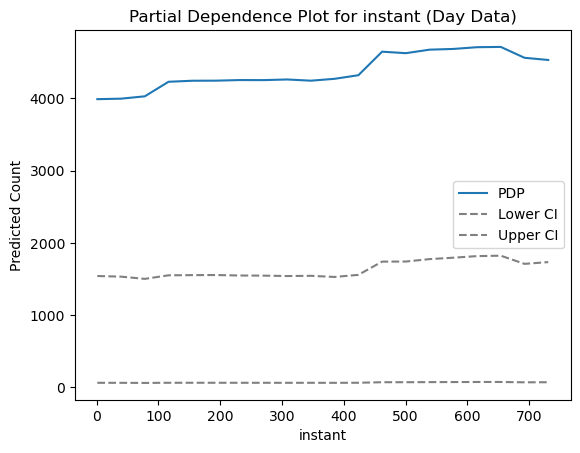

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


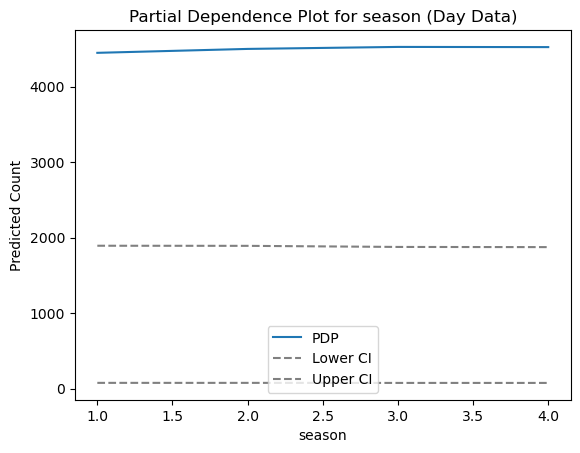

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


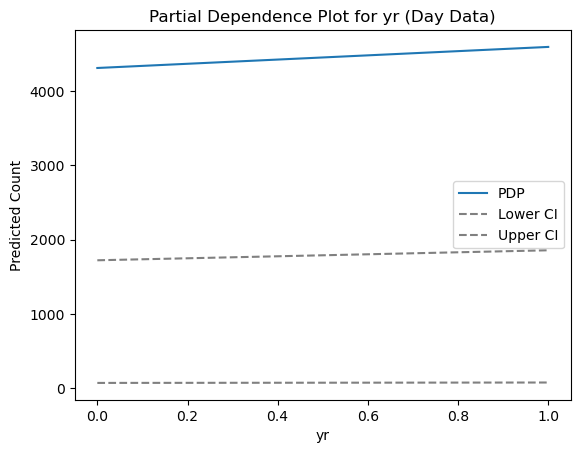

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


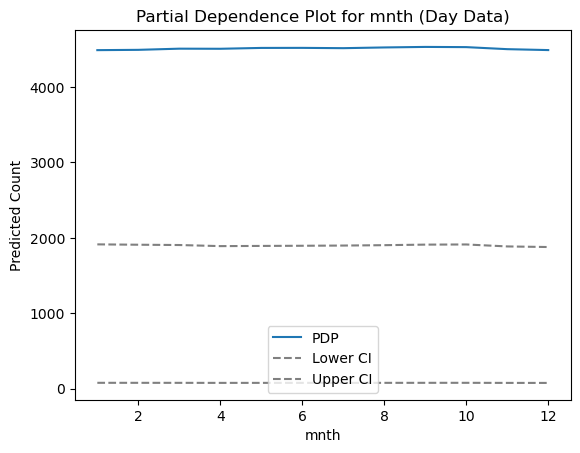

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


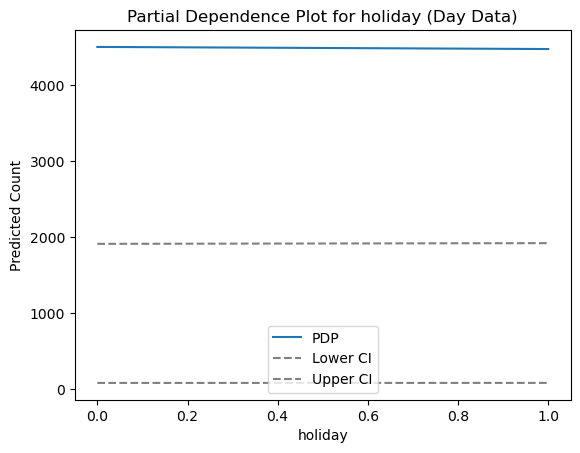

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


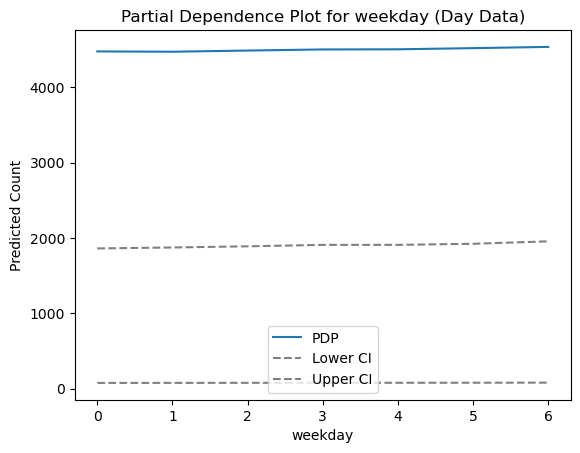

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


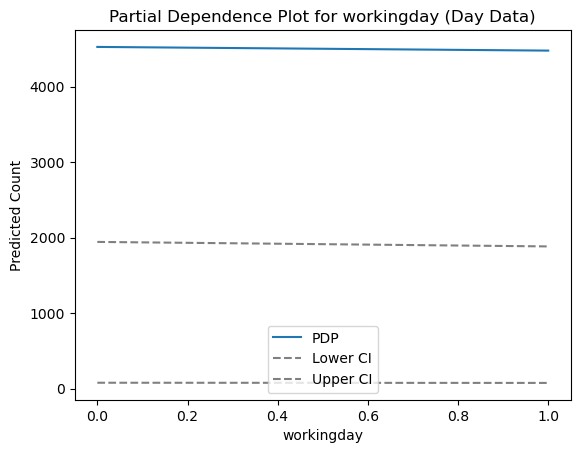

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


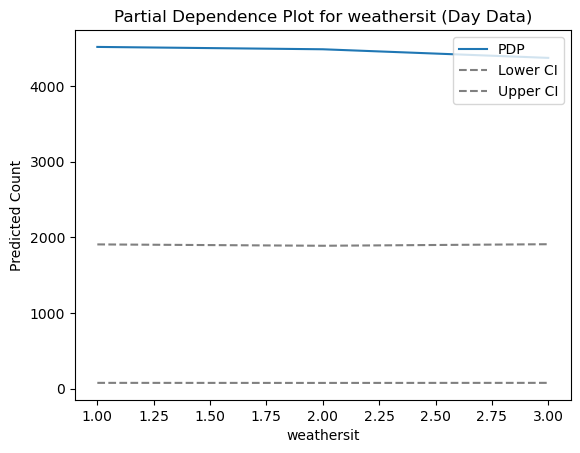

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


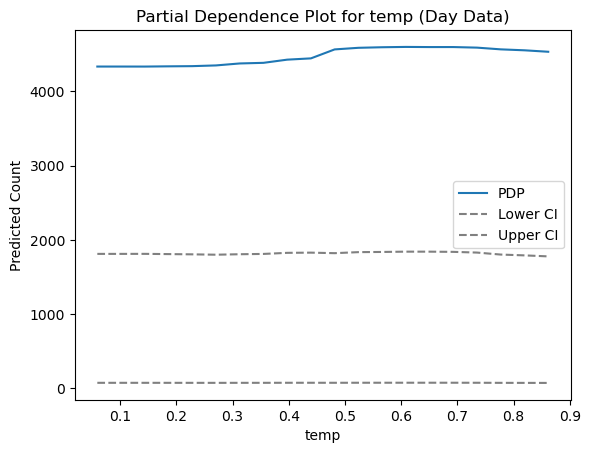

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


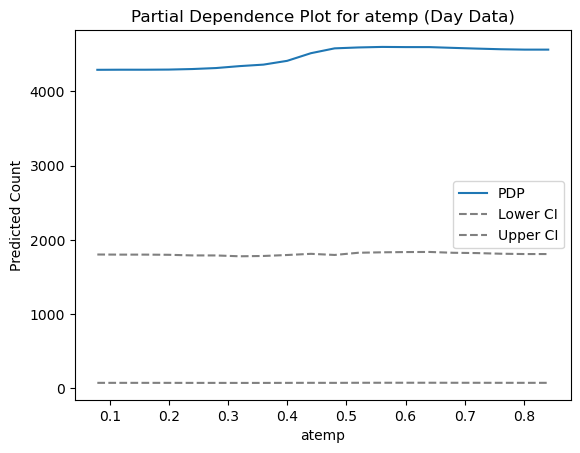

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


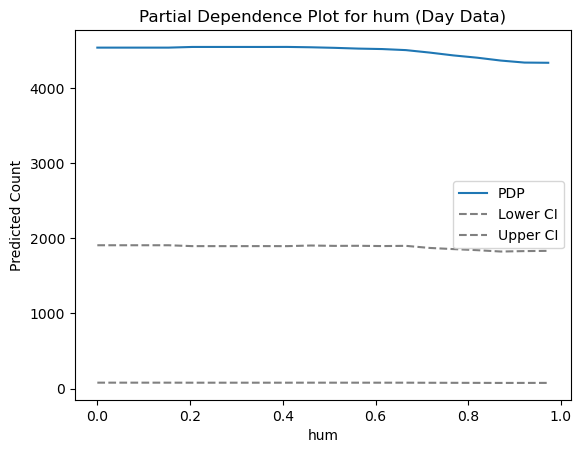

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


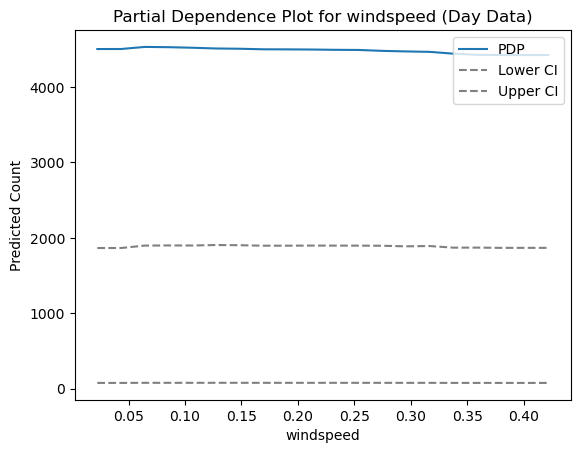

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


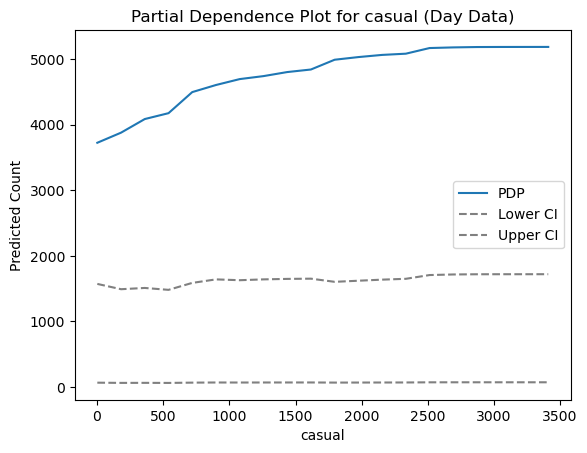

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


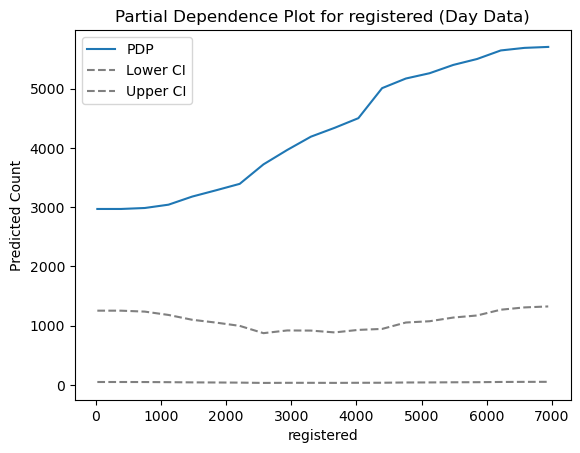

In [46]:
# Partial Dependence Plots (PDPs) for each feature
for i, feature_name in enumerate(x):
    pdp_day = rf_model_day.partial_plot(data=train_day, cols=[feature_name], plot=False)
    feature_values = pdp_day[0][0]
    pdp_values = pdp_day[0][1]
    pdp_lower_values = pdp_day[0][2]
    pdp_upper_values = pdp_day[0][3]
    
    plt.figure()
    plt.plot(feature_values, pdp_values, label='PDP')
    plt.plot(feature_values, pdp_lower_values, linestyle='--', color='gray', label='Lower CI')
    plt.plot(feature_values, pdp_upper_values, linestyle='--', color='gray', label='Upper CI')
    plt.xlabel(feature_name)
    plt.ylabel('Predicted Count')
    plt.title(f"Partial Dependence Plot for {feature_name} (Day Data)")
    plt.legend()
    plt.show()


PartialDependencePlot progress: |█████████████████████████████████████████| 100%


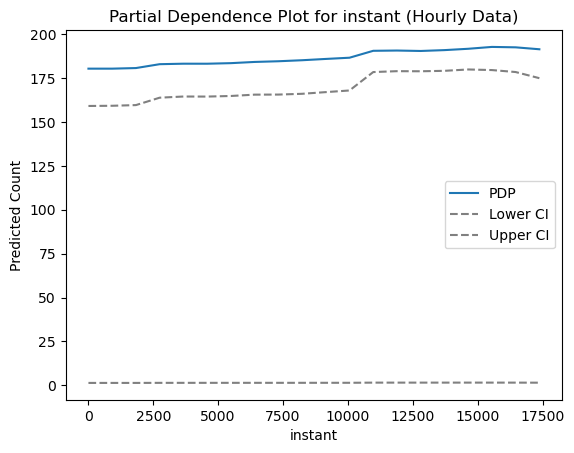

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


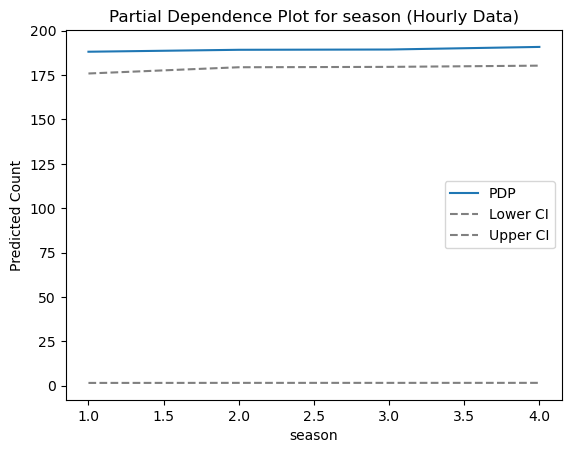

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


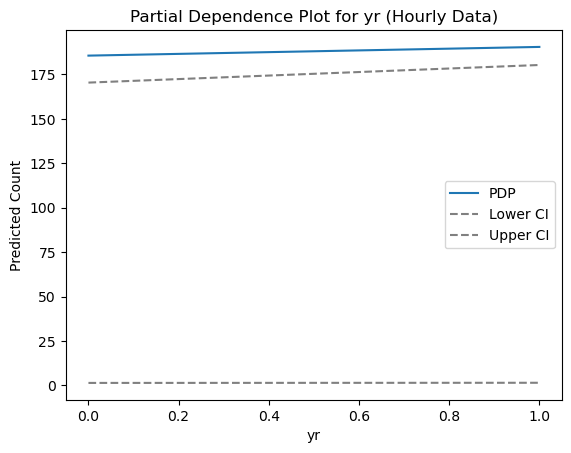

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


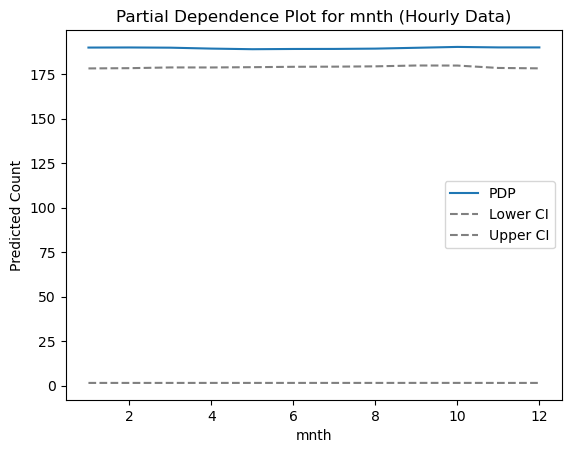

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


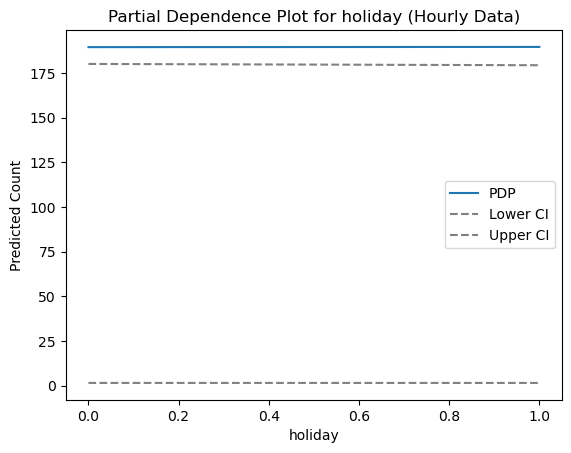

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


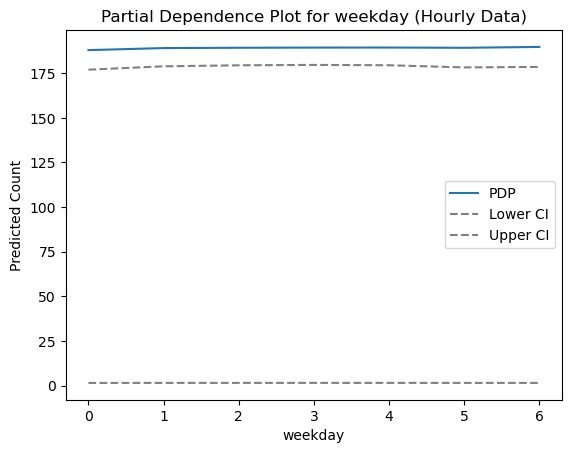

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


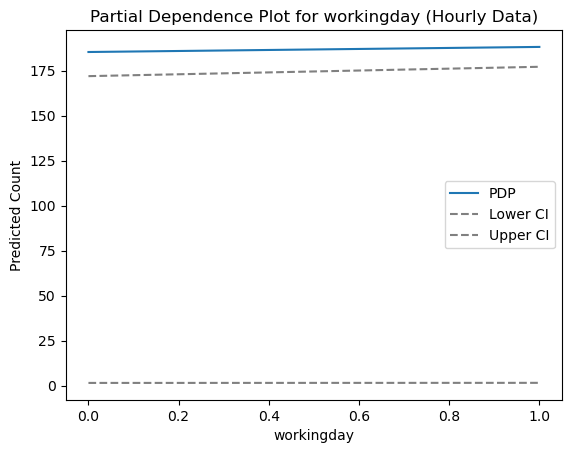

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


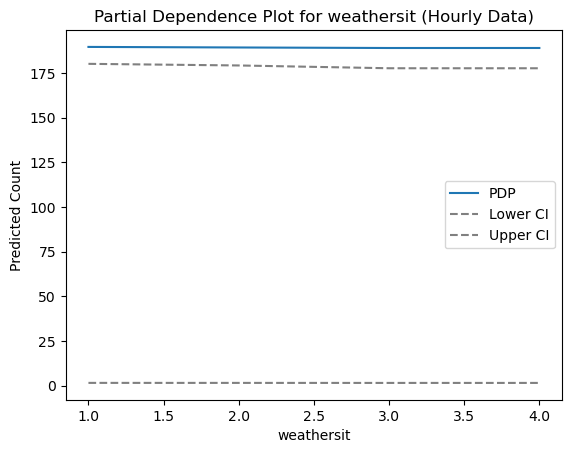

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


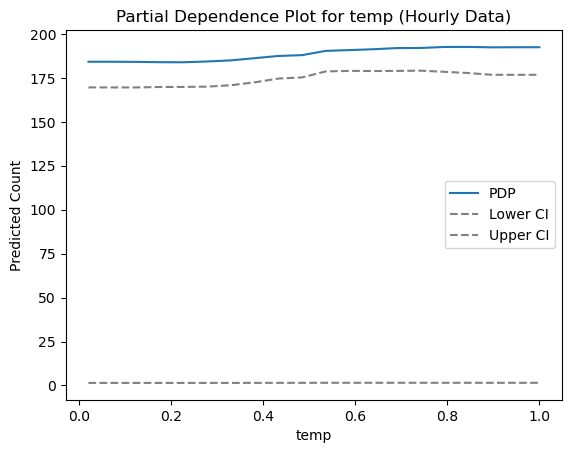

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


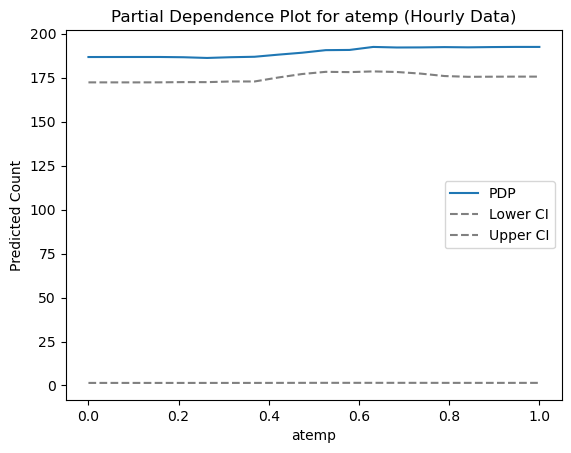

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


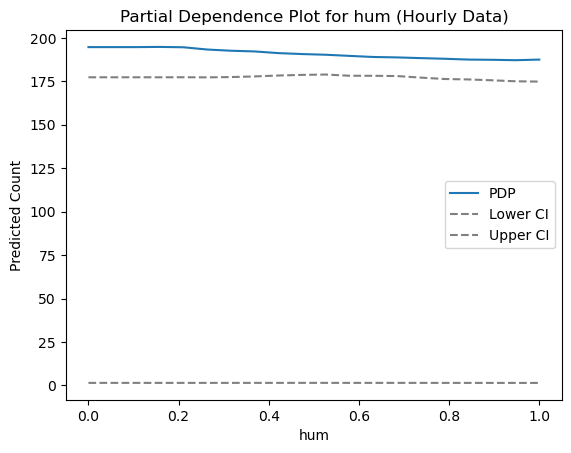

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


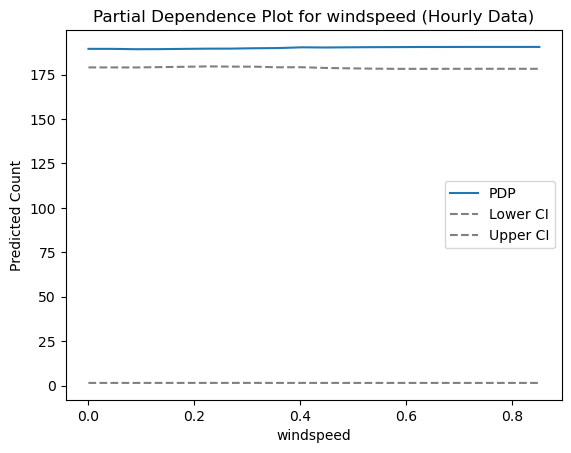

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


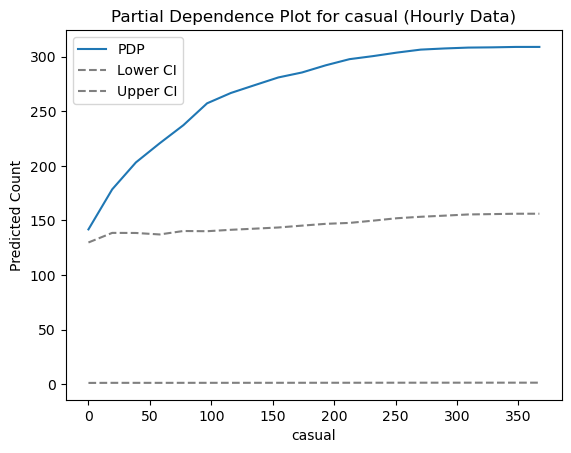

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


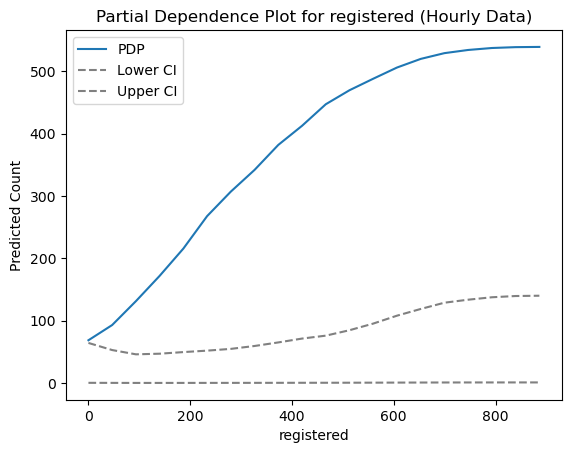

In [49]:
# Partial Dependence Plots (PDPs) for each feature (Hourly Data)
for i, feature_name in enumerate(x):
    pdp_hour = rf_model_hour.partial_plot(data=train_hour, cols=[feature_name], plot=False)
    feature_values_hour = pdp_hour[0][0]
    pdp_values_hour = pdp_hour[0][1]
    pdp_lower_values_hour = pdp_hour[0][2]
    pdp_upper_values_hour = pdp_hour[0][3]
    
    plt.figure()
    plt.plot(feature_values_hour, pdp_values_hour, label='PDP')
    plt.plot(feature_values_hour, pdp_lower_values_hour, linestyle='--', color='gray', label='Lower CI')
    plt.plot(feature_values_hour, pdp_upper_values_hour, linestyle='--', color='gray', label='Upper CI')
    plt.xlabel(feature_name)
    plt.ylabel('Predicted Count')
    plt.title(f"Partial Dependence Plot for {feature_name} (Hourly Data)")
    plt.legend()
    plt.show()


c) Try at least two models (AutoML and any other model like gradient
boosting) for the Day dataset

In [80]:
# Load the Day dataset
day_data = h2o.import_file("day.csv")

# Define the target variable and feature columns
y = "cnt"
x = day_data.columns.remove(y)

# Split the data into training and testing sets
train_day, test_day = day_data.split_frame(ratios=[0.8])

# Build H2O AutoML model
auto_ml = H2OAutoML(max_runtime_secs=300, seed=1)
auto_ml.train(x=x, y=y, training_frame=train_day)

# Train Gradient Boosting model
gbm_model_day = H2OGradientBoostingEstimator(seed=1)
gbm_model_day.train(x=x, y=y, training_frame=train_day)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |█
00:13:16.756: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [84]:
# Variable Importances
# feature_importance_day = auto_ml.varimp(use_pandas=True)
feature_importance_gbm = gbm_model_day.varimp(use_pandas=True)

In [85]:
print("Feature Importance (Hourly Data):")
print(feature_importance_gbm)

Feature Importance (Hourly Data):
      variable  relative_importance  scaled_importance  percentage
0   registered         1.031257e+10           1.000000    0.890814
1       casual         1.239305e+09           0.120174    0.107053
2       dteday         9.558977e+06           0.000927    0.000826
3      instant         8.878464e+06           0.000861    0.000767
4         temp         3.352918e+06           0.000325    0.000290
5          hum         7.786814e+05           0.000076    0.000067
6        atemp         7.133824e+05           0.000069    0.000062
7      weekday         6.800762e+05           0.000066    0.000059
8    windspeed         4.500379e+05           0.000044    0.000039
9   workingday         9.382641e+04           0.000009    0.000008
10        mnth         8.052827e+04           0.000008    0.000007
11  weathersit         6.224156e+04           0.000006    0.000005
12      season         3.991188e+04           0.000004    0.000003
13          yr         0.000

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


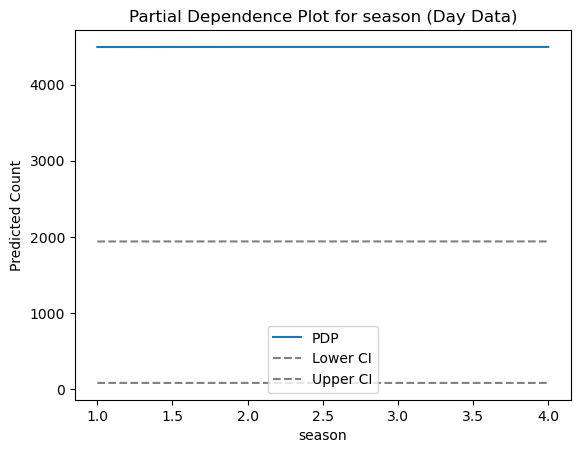

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


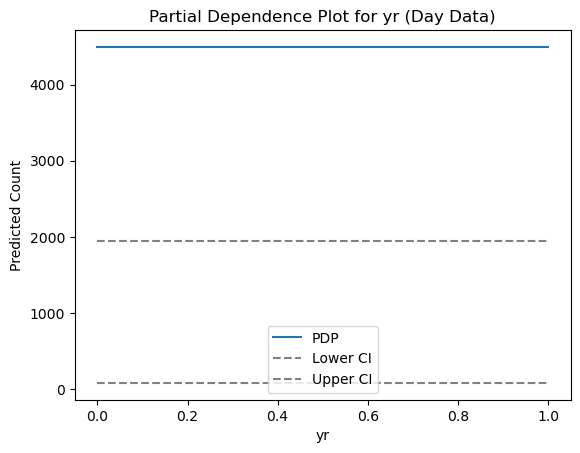

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


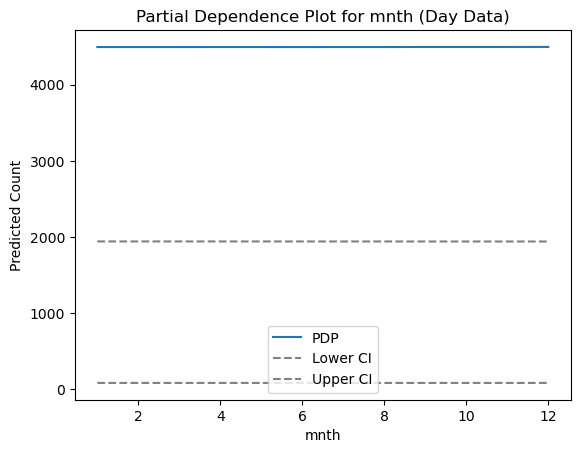

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


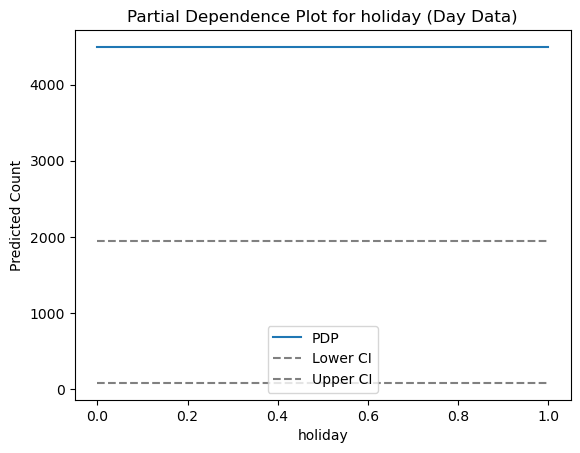

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


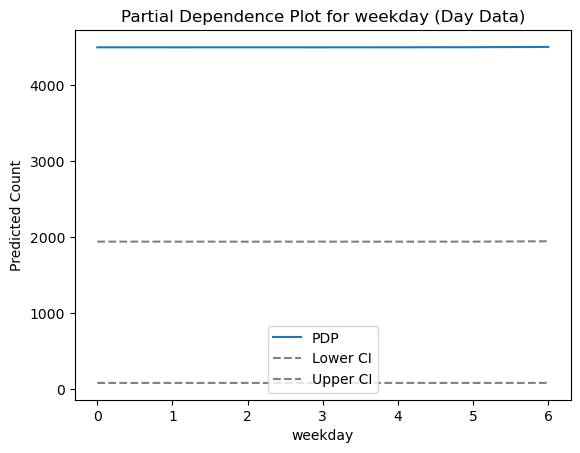

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


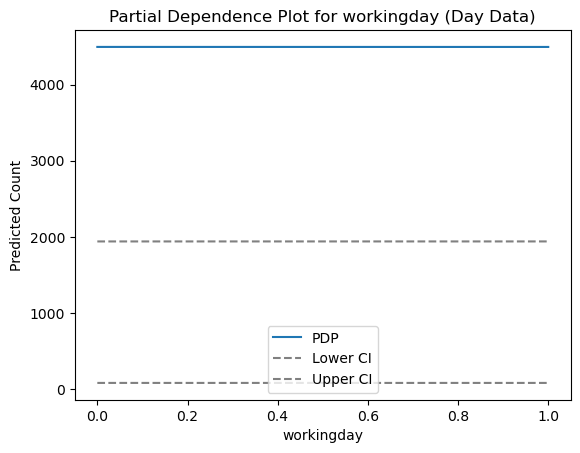

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


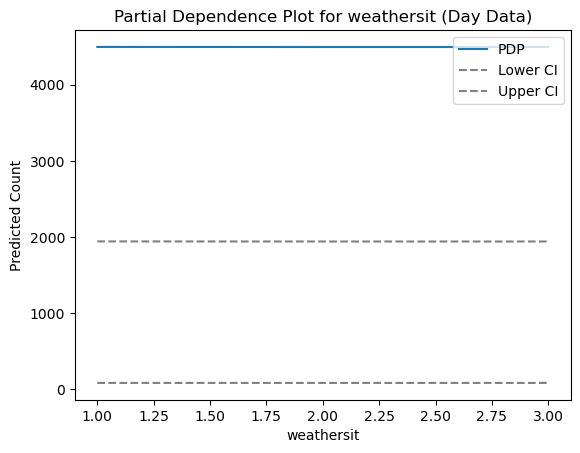

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


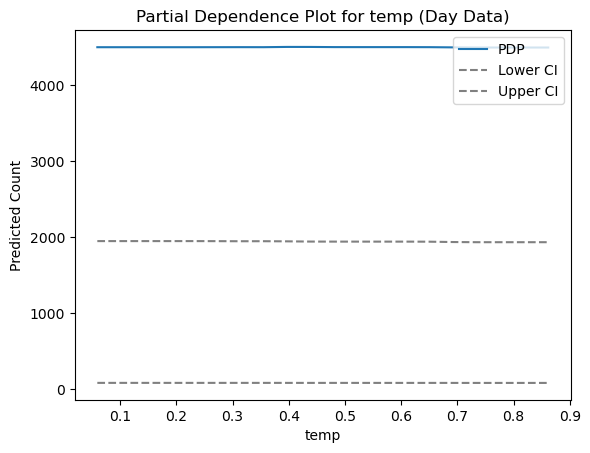

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


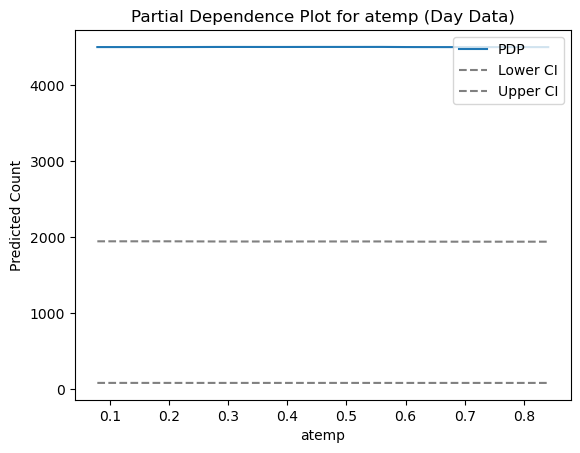

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


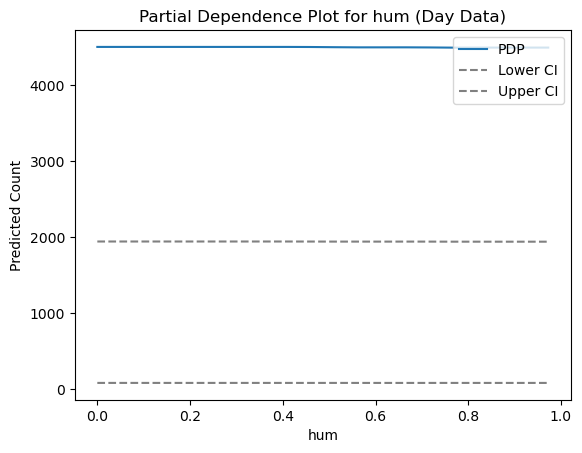

PartialDependencePlot progress: |█████████████████████████████████████████| 100%


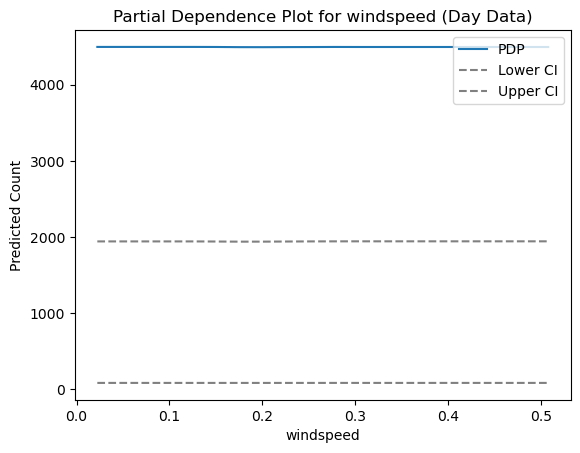

In [87]:
# Partial Dependence Plots (PDPs) for each feature
for i, feature_name in enumerate(x_day):
    pdp_day = gbm_model_day.partial_plot(data=train_day, cols=[feature_name], plot=False)
    feature_values = pdp_day[0][0]
    pdp_values = pdp_day[0][1]
    pdp_lower_values = pdp_day[0][2]
    pdp_upper_values = pdp_day[0][3]
    
    plt.figure()
    plt.plot(feature_values, pdp_values, label='PDP')
    plt.plot(feature_values, pdp_lower_values, linestyle='--', color='gray', label='Lower CI')
    plt.plot(feature_values, pdp_upper_values, linestyle='--', color='gray', label='Upper CI')
    plt.xlabel(feature_name)
    plt.ylabel('Predicted Count')
    plt.title(f"Partial Dependence Plot for {feature_name} (Day Data)")
    plt.legend()
    plt.show()


d) Discuss how various plots try to explain the amount of bikes rented
correspond to the various environmental conditions.

The plots and analyses conducted on the bike rental dataset using H2O reveal valuable insights about the impact of environmental conditions on bike rentals. The Partial Dependence Plots (PDPs) illustrate how factors like temperature, humidity, and wind speed influence rentals individually. The SHAP Summary Plot highlights key features driving predictions, such as year and adjusted temperature. These insights underscore that higher temperatures and comfortable conditions tend to correlate with increased bike rentals, aiding businesses in making informed decisions.